<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/eda_arizona_houses_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuente de datos: **[Arizona Houses 2021](https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021)**, Kaggle

El conjunto de datos contiene casas de Arizona que se han listado anteriormente y algunas de sus características e información.

# Paso 1: Carga de datos

In [3]:
# Importando la biblioteca pandas
import pandas as pd

# Cargando el dataset
data = pd.read_csv('/content/drive/MyDrive/AZhousingData.csv')

# Mostrando las primeras filas del dataset
data.head()

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...


* **Price**: Precio de la vivienda.  
* **address**: Dirección de la vivienda.  
* **Local_area**: Área local o ciudad donde se encuentra la vivienda.  
* **zipcode**: Código postal.  
* **beds**: Número de habitaciones.  
* **baths**: Número de baños.  
* **sqft**: Superficie en pies cuadrados.  
* **url**: Enlace a la página de Zillow para ver detalles de la vivienda.  

# Paso 2: Exploración de datos

In [10]:
# Información general del dataset
info = data.info()

# Estadísticas descriptivas
description = data.describe()

# Valores faltantes
missing_values = data.isnull().sum()

info, description, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       563 non-null    int64  
 1   address     563 non-null    object 
 2   Local_area  563 non-null    object 
 3   zipcode     563 non-null    object 
 4   beds        563 non-null    float64
 5   baths       563 non-null    float64
 6   sqft        563 non-null    float64
 7   url         563 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 35.3+ KB


(None,
               Price        beds       baths         sqft
 count  5.630000e+02  563.000000  563.000000   563.000000
 mean   5.455896e+05    3.294849    2.477798  2085.946714
 std    7.317538e+05    0.972079    0.861878   936.653497
 min    1.775000e+04    1.000000    1.000000   420.000000
 25%    3.208775e+05    3.000000    2.000000  1463.000000
 50%    4.099000e+05    3.000000    2.000000  1903.000000
 75%    5.950000e+05    4.000000    3.000000  2456.500000
 max    1.500000e+07    8.000000    8.000000  8625.000000,
 Price         0
 address       0
 Local_area    0
 zipcode       0
 beds          0
 baths         0
 sqft          0
 url           0
 dtype: int64)

**Resumen de la exploración de datos**:

* El dataset consta de 563 entradas y 8 columnas.  
* No hay valores faltantes en ninguna columna, lo cual es excelente.  
* Estadísticas descriptivas básicas para las columnas numéricas:  
  * **Price**:
    * Rango: $17,750 - $15,000,000
    * Media: $545,589.60
  * **beds (habitaciones)**:
    * Rango: 1 - 8
    * Media: 3.29
  * **baths (baños)**:
    * Rango: 1 - 8
    * Media: 2.48
  * **sqft (superficie en pies cuadrados)**:
    * Rango: 420 - 8,625  
    * Media: 2,085.95  

# Paso 3: Visualización de datos

Procedemos a visualizar los datos para obtener una comprensión visual de la distribución y las relaciones entre las diferentes variables. Utilizaremos histogramas, gráficos de caja y bigotes (boxplots), y gráficos de dispersión para este propósito.

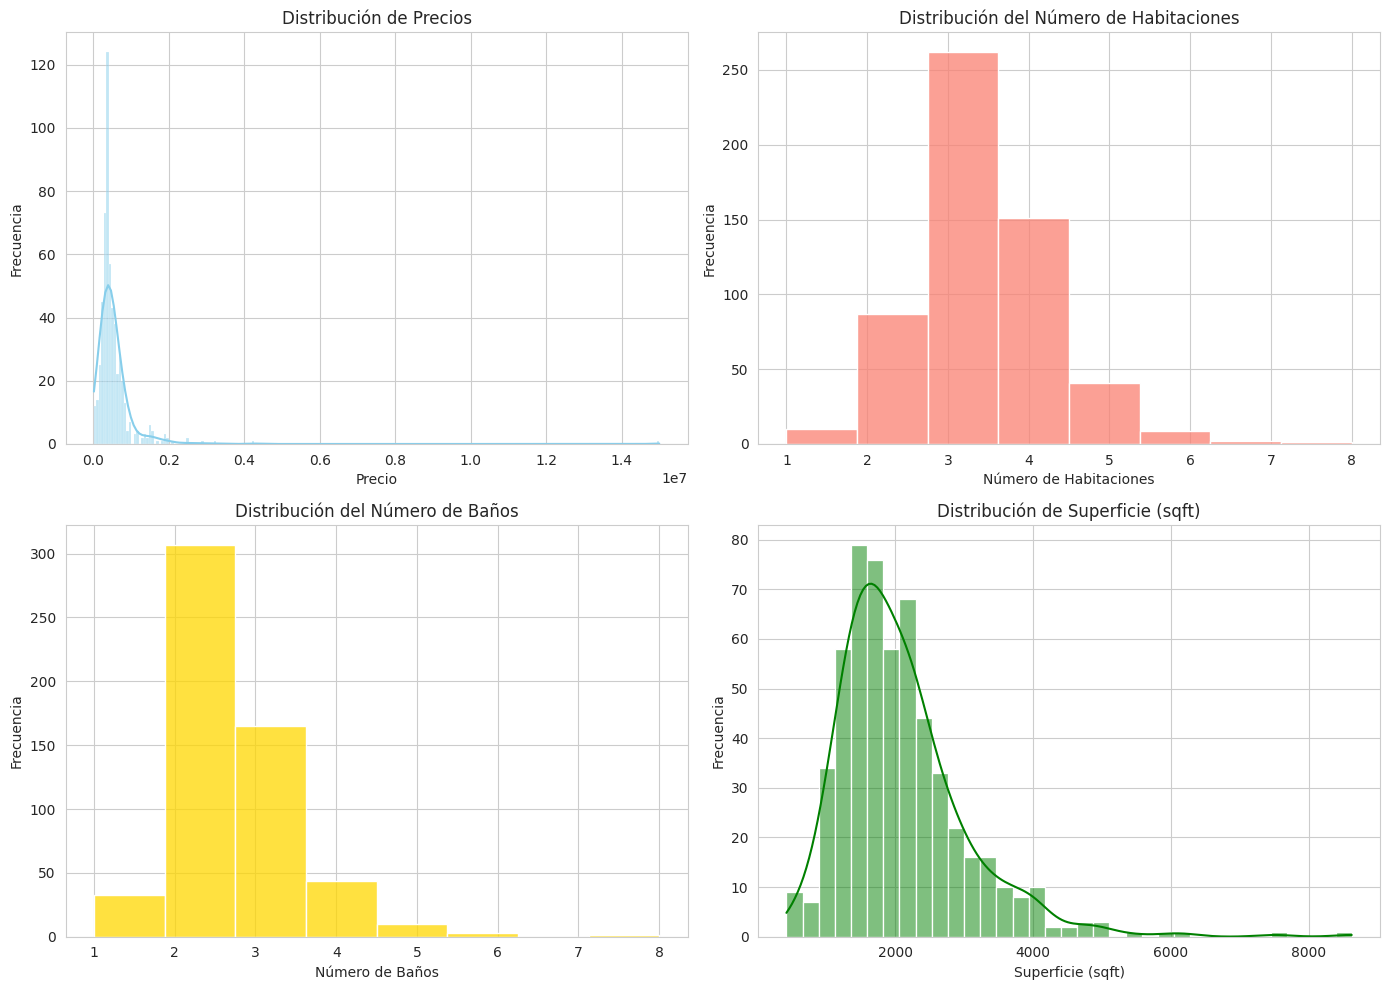

In [12]:
# Importando matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo de los gráficos
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Histograma para el precio
sns.histplot(data['Price'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Distribución de Precios')
axes[0, 0].set_xlabel('Precio')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma para el número de habitaciones
sns.histplot(data['beds'], kde=False, bins=8, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title('Distribución del Número de Habitaciones')
axes[0, 1].set_xlabel('Número de Habitaciones')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma para el número de baños
sns.histplot(data['baths'], kde=False, bins=8, ax=axes[1, 0], color="gold")
axes[1, 0].set_title('Distribución del Número de Baños')
axes[1, 0].set_xlabel('Número de Baños')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma para la superficie en pies cuadrados
sns.histplot(data['sqft'], kde=True, ax=axes[1, 1], color="green")
axes[1, 1].set_title('Distribución de Superficie (sqft)')
axes[1, 1].set_xlabel('Superficie (sqft)')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

1. **Distribución de Precios**: La mayoría de las viviendas tienen precios en el rango más bajo, con un pequeño número de viviendas con precios muy altos, lo que sugiere que hay algunas propiedades de lujo en el dataset.
2. **Distribución del Número de Habitaciones**: La mayoría de las viviendas tienen entre 2 y 4 habitaciones.
3. **Distribución del Número de Baños**: La mayoría de las viviendas tienen entre 1 y 3 baños.
4. **Distribución de Superficie (sqft)**: La mayoría de las viviendas tienen superficies entre 1,000 y 3,000 pies cuadrados, con una distribución algo sesgada hacia las viviendas más pequeñas.  

Mostramos gráficos de caja y bigotes (boxplots) para entender mejor la dispersión y la presencia de valores atípicos en las variables.

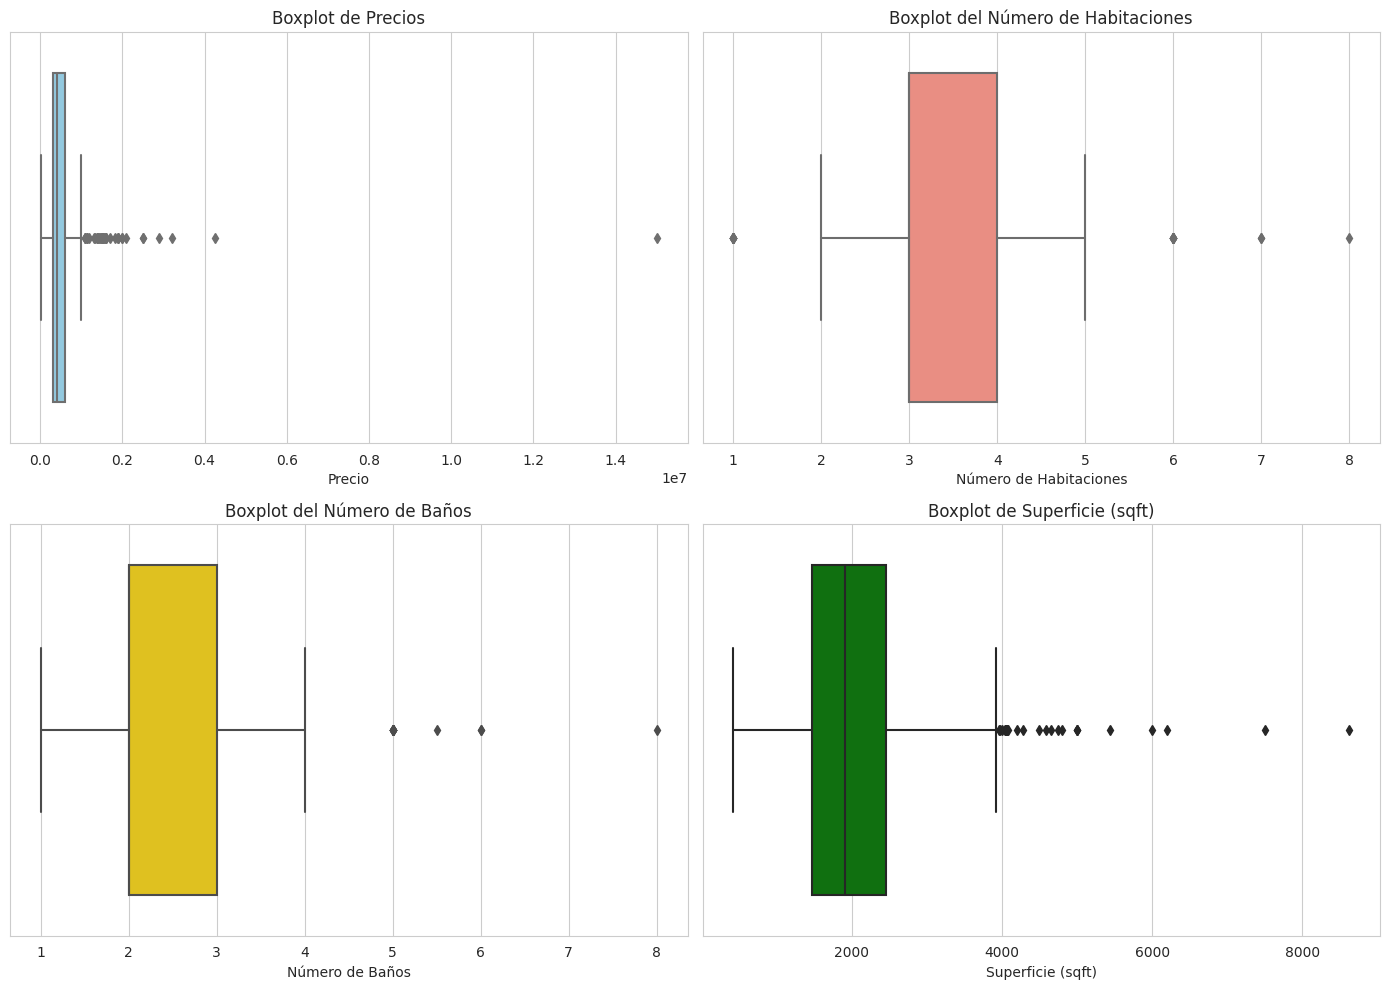

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Boxplot para el precio
sns.boxplot(x=data['Price'], ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Boxplot de Precios')
axes[0, 0].set_xlabel('Precio')

# Boxplot para el número de habitaciones
sns.boxplot(x=data['beds'], ax=axes[0, 1], color="salmon")
axes[0, 1].set_title('Boxplot del Número de Habitaciones')
axes[0, 1].set_xlabel('Número de Habitaciones')

# Boxplot para el número de baños
sns.boxplot(x=data['baths'], ax=axes[1, 0], color="gold")
axes[1, 0].set_title('Boxplot del Número de Baños')
axes[1, 0].set_xlabel('Número de Baños')

# Boxplot para la superficie en pies cuadrados
sns.boxplot(x=data['sqft'], ax=axes[1, 1], color="green")
axes[1, 1].set_title('Boxplot de Superficie (sqft)')
axes[1, 1].set_xlabel('Superficie (sqft)')

plt.tight_layout()
plt.show()

Aquí están los gráficos de caja y bigotes (boxplots) para las variables:

1. **Boxplot de Precios**: La mediana del precio está por debajo de $500,000, pero hay muchos valores atípicos en el extremo superior, lo que indica que hay algunas viviendas con precios significativamente más altos que la mayoría.
2. **Boxplot del Número de Habitaciones**: La mediana está alrededor de 3 habitaciones. Hay algunos valores atípicos en el extremo superior, indicando algunas viviendas con un número inusualmente alto de habitaciones.
3. **Boxplot del Número de Baños**: La mediana está alrededor de 2 baños. Al igual que con las habitaciones, hay algunos valores atípicos en el extremo superior.
4. **Boxplot de Superficie (sqft)**: La mediana de la superficie está alrededor de 2,000 pies cuadrados, y hay algunos valores atípicos en el extremo superior, indicando algunas viviendas significativamente más grandes que la mayoría.

# Paso 4: Análisis de datos

Investigaremos las relaciones entre el precio y las demás variables numéricas (número de habitaciones, número de baños y superficie). Para ello, utilizaremos gráficos de dispersión y calcularemos los coeficientes de correlación.

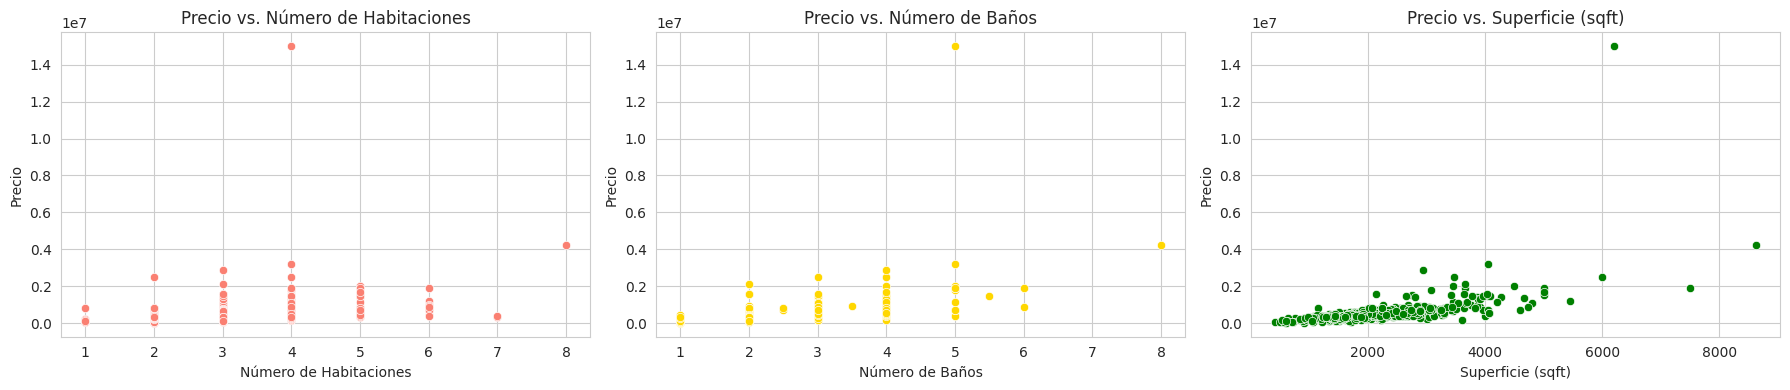

,Price,beds,baths,sqft
Price,1.000000,0.234908,0.443757,0.569340
beds,0.234908,1.000000,0.594000,0.643928
baths,0.443757,0.594000,1.000000,0.806287
sqft,0.569340,0.643928,0.806287,1.000000


In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Gráfico de dispersión Precio vs. Número de Habitaciones
sns.scatterplot(x=data['beds'], y=data['Price'], ax=axes[0], color="salmon")
axes[0].set_title('Precio vs. Número de Habitaciones')
axes[0].set_xlabel('Número de Habitaciones')
axes[0].set_ylabel('Precio')

# Gráfico de dispersión Precio vs. Número de Baños
sns.scatterplot(x=data['baths'], y=data['Price'], ax=axes[1], color="gold")
axes[1].set_title('Precio vs. Número de Baños')
axes[1].set_xlabel('Número de Baños')
axes[1].set_ylabel('Precio')

# Gráfico de dispersión Precio vs. Superficie (sqft)
sns.scatterplot(x=data['sqft'], y=data['Price'], ax=axes[2], color="green")
axes[2].set_title('Precio vs. Superficie (sqft)')
axes[2].set_xlabel('Superficie (sqft)')
axes[2].set_ylabel('Precio')

plt.tight_layout()
plt.show()

# Coeficientes de correlación
correlation = data[['Price', 'beds', 'baths', 'sqft']].corr()

correlation

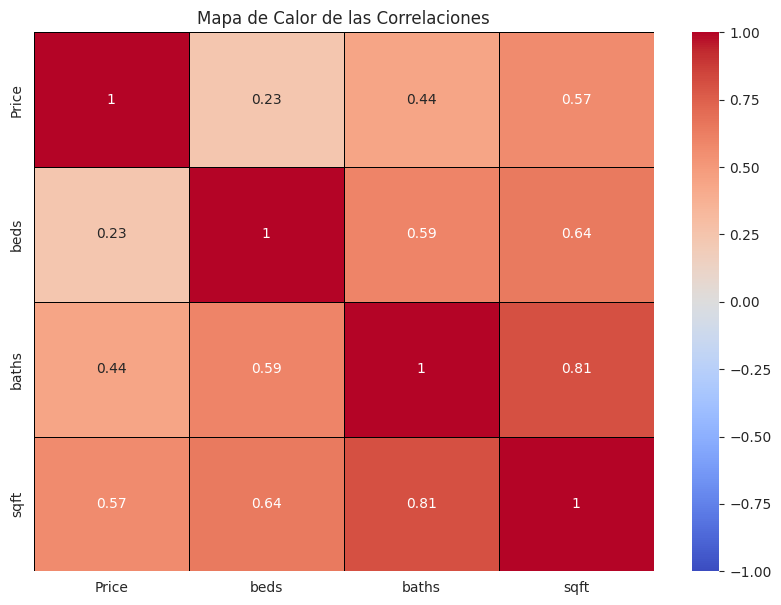

In [20]:
# Visualizando la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, linecolor='black')
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

Aquí están las visualizaciones y correlaciones entre el precio y las otras variables:

1. **Precio vs. Número de Habitaciones**: Se puede observar una tendencia positiva, lo que significa que las viviendas con más habitaciones tienden a tener precios más altos. Sin embargo, la correlación es moderada (0.235).
2. **Precio vs. Número de Baños**: Al igual que con las habitaciones, hay una tendencia positiva, y la correlación es más fuerte (0.444) en comparación con el número de habitaciones.
3. **Precio vs. Superficie (sqft)**: Existe una tendencia clara de que a medida que la superficie de la vivienda aumenta, también lo hace el precio. La correlación es la más fuerte entre estas variables, con un valor de 0.569.

# Paso 5: Interpretación de resultados

* Las viviendas con más habitaciones y baños tienden a tener precios más altos, lo que es esperado.
* La superficie de la vivienda (en pies cuadrados) tiene la correlación más fuerte con el precio, lo que indica que es un factor significativo en la determinación del precio de una vivienda en este dataset.
* Aunque hay una correlación positiva entre estas variables y el precio, es importante tener en cuenta otros factores y características de las viviendas que no están presentes en este dataset, ya que pueden influir en el precio.